In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier

In [6]:
# PART A: in this cell, you should implement the `cluster` function
#   we ask that you set `random_state=0` to keep the function deterministic

from sklearn.preprocessing import StandardScaler

numerical_features = [
    'bpm', 'sec_duration',  'number_fights', 'trope_count' ]

binary_features = [
    'student_writer', 'official_song', 'contest', 'fight',
    'victory', 'win_won', 'victory_win_won', 'rah',
    'nonsense', 'colors', 'men', 'opponents', 'spelling' ]

def cluster(df, n_clusters):
###
### YOUR CODE HERE
###

    # dropping non-numerical and non-binary columns
    df = df.drop([
        'school', 'conference', 'song_name', 'writers', 'year', 'spotify_id'], axis=1)
    # binary columns
    tobe_binary = df[['student_writer', 'official_song', 'contest', 'fight',
        'victory', 'win_won', 'victory_win_won', 'rah',
        'nonsense', 'colors', 'men', 'opponents', 'spelling']]
    #non-binary columns
    non_binary = df.drop([
        'student_writer', 'official_song', 'contest', 'fight',
        'victory', 'win_won', 'victory_win_won', 'rah',
        'nonsense', 'colors', 'men', 'opponents', 'spelling'], axis=1)

    # binary columns -> binary values (get yes column, drop no and unknown columns)
    binary = pd.get_dummies(tobe_binary)
    binary = binary.drop([
        'official_song_No', 'contest_No', 'fight_No', 'victory_No', 'win_won_No', 
        'victory_win_won_No', 'rah_No', 'nonsense_No', 'colors_No', 'men_No', 'opponents_No', 
        'spelling_No', 'student_writer_No', 'student_writer_Unknown'], axis=1)
    
    # adding binary to standardized nonbinary values
    df_2 = np.hstack([non_binary, binary])

    # standardizing
    scaler = StandardScaler()
    df_2 = scaler.fit_transform(df_2)

    # perform kmeans learning
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(df_2)
    
    return kmeans

In [7]:
df = pd.read_csv("../resource/asnlib/publicdata/fight-songs.csv")
clustering = cluster(df, 5)

assert isinstance(clustering, KMeans)

###
### AUTOGRADER TEST - DO NOT REMOVE
###


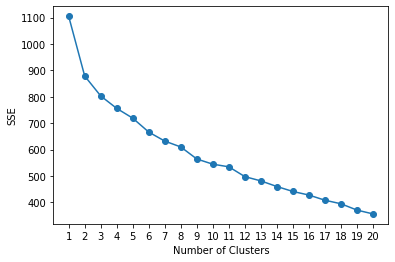

In [10]:
# PART B: in this cell, you should implement the `discover_optimal_k` function
#   it should plot the "knee plot" using matplotlib and also return the array of errors

from matplotlib import pyplot as plt

def discover_optimal_k(df):
###
### YOUR CODE HERE
###
    # dropping non-numerical and non-binary columns
    df = df.drop([
        'school', 'conference', 'song_name', 'writers', 'year', 'spotify_id'], axis=1)
    # binary columns
    tobe_binary = df[['student_writer', 'official_song', 'contest', 'fight',
        'victory', 'win_won', 'victory_win_won', 'rah',
        'nonsense', 'colors', 'men', 'opponents', 'spelling']]
    #non-binary columns
    non_binary = df.drop([
        'student_writer', 'official_song', 'contest', 'fight',
        'victory', 'win_won', 'victory_win_won', 'rah',
        'nonsense', 'colors', 'men', 'opponents', 'spelling'], axis=1)

    # binary columns -> binary values (get yes column, drop no and unknown columns)
    binary = pd.get_dummies(tobe_binary)
    binary = binary.drop([
        'official_song_No', 'contest_No', 'fight_No', 'victory_No', 'win_won_No', 
        'victory_win_won_No', 'rah_No', 'nonsense_No', 'colors_No', 'men_No', 'opponents_No', 
        'spelling_No', 'student_writer_No', 'student_writer_Unknown'], axis=1)
    
    # adding binary to standardized nonbinary values
    df_2 = np.hstack([non_binary, binary])

    # standardizing
    scaler = StandardScaler()
    df_2 = scaler.fit_transform(df_2)

    # perform kmeans learning
    kmeans = KMeans(random_state=0)
    kmeans.fit(df_2)
    
    sse = []
    for k in range(1, 21):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(df_2)
        sse.append(kmeans.inertia_)

    #visualize results
    plt.plot(range(1, 21), sse, marker='o')
    plt.xticks(range(1, 21))
    plt.xlabel("Number of Clusters")
    plt.ylabel("SSE")
    plt.show()
    
    return np.array(sse)

discover_optimal_k(df);

In [ ]:
assert isinstance(discover_optimal_k(df), np.ndarray)

###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [1]:
# PART C. in this cell, you should implement the `decision_tree` function
#   where applicable, we ask that you set `random_state=0` to keep the function deterministic

def decision_tree(df, kmeans):
###
### YOUR CODE HERE
###

    # dropping non-numerical and non-binary columns
    df = df.drop([
        'school', 'conference', 'song_name', 'writers', 'year', 'spotify_id'], axis=1)
    # binary columns
    tobe_binary = df[['student_writer', 'official_song', 'contest', 'fight',
        'victory', 'win_won', 'victory_win_won', 'rah',
        'nonsense', 'colors', 'men', 'opponents', 'spelling']]
    #non-binary columns
    non_binary = df.drop([
        'student_writer', 'official_song', 'contest', 'fight',
        'victory', 'win_won', 'victory_win_won', 'rah',
        'nonsense', 'colors', 'men', 'opponents', 'spelling'], axis=1)

    # binary columns -> binary values (get yes column, drop no and unknown columns)
    binary = pd.get_dummies(tobe_binary)
    binary = binary.drop([
        'official_song_No', 'contest_No', 'fight_No', 'victory_No', 'win_won_No', 
        'victory_win_won_No', 'rah_No', 'nonsense_No', 'colors_No', 'men_No', 'opponents_No', 
        'spelling_No', 'student_writer_No', 'student_writer_Unknown'], axis=1)
    
    # adding binary to standardized nonbinary values
    df_2 = np.hstack([non_binary, binary])

    # standardizing
    scaler = StandardScaler()
    df_2 = scaler.fit_transform(df_2)
    
    # decision tree
    labels = kmeans.labels_
    clf = DecisionTreeClassifier(criterion='entropy')
    clf.fit(df_2, labels)
    
    print(kmeans)
    
    return clf

In [23]:
assert isinstance(decision_tree(df, cluster(df, 5)), DecisionTreeClassifier)

###
### AUTOGRADER TEST - DO NOT REMOVE
###


KMeans(n_clusters=5, random_state=0)
